In [489]:
%matplotlib inline
%load_ext autoreload
%autoreload

import os, sys
parentdir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
sys.path.append(parentdir)

from quanty.model import backtester as q
from quanty.model import backtester_base as q_base
from quanty.model import db_manager as dm
from quanty.model import plotter as pltr
from quanty.model import setting
from quanty.model.portfolio import Port
from quanty.model.dual_momentum import DualMomentumSelector, DualMomentumPort

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.debugger import set_trace

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [490]:
#db = dm.read_db(base='prices_global.pkl', add=['prices_kr.pkl'])
#db_kr = dm.read_db(base='prices_kr.pkl', add=['prices_global.pkl'])

In [491]:
db = dm.read_db(base='global_20201005.pkl', add=[])

# Global sector allocation model

In [308]:
gsam = q.Backtester(
    setting.base_params(db), 
    w_type='inv_ranky2', 
    rebal_style='cum', 
    n_picks=5, 
    assets=setting.assets_global_sector, 
    sig_w_base=[1,0,0,0,0,0,0,0,0,0,0,0], 
    #sig_w_dynamic=True, 
    sig_dyn_fwd=21*np.array([1]), 
    #sig_dyn_m_backs=12, 
    #sig_dyn_thres=0.0, 
    follow_trend=(20,60), 
    follow_trend_market=(20,60), 
    follow_trend_supporter=(60,250), 
    strong_condition=True, 
    market='ACWI', 
    #supporter='BND_US_Long', 
    cash_equiv='ACWI', #'BND_US_Tbill', 
    start='2010-12-31', 
    end='2020-09-30' 
)


13.359257698059082


<Figure size 432x288 with 0 Axes>

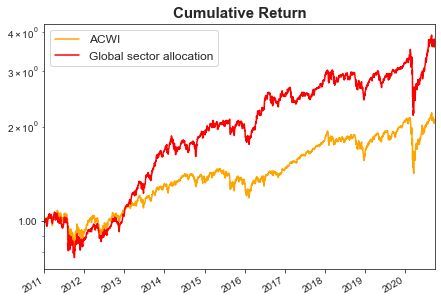

In [309]:
strats = ['ACWI', 'DualMomentum']
names = ['ACWI', 'Global sector allocation']
color = ['orange', 'r']

gsam.plot_cum(strats, names=names, color=color, logy=True);

<Figure size 432x288 with 0 Axes>

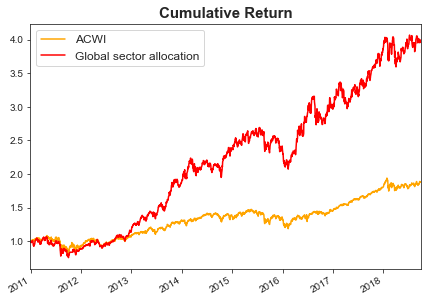

In [218]:
strats = ['ACWI', 'DualMomentum']
names = ['ACWI', 'Global sector allocation']
color = ['orange', 'r']

gsam.plot_cum(strats, names=names, color=color, logy=False);

<Figure size 432x288 with 0 Axes>

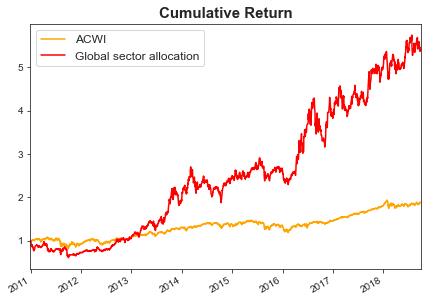

In [165]:
strats = ['ACWI', 'DualMomentum']
names = ['ACWI', 'Global sector allocation']
color = ['orange', 'r']

gsam.plot_cum(strats, names=names, color=color, logy=False);

In [310]:
gsam.get_stats().tail()

,cum_last,n_samples,cagr,std,sharpe,mdd,cagr_roll_med,std_roll_med,sharpe_roll_med,beta,loss_proba,hit,profit_to_loss,consistency
Internet,5.49,2454,18.96,22.25,0.85,-30.53,18.55,19.67,0.93,1.05,10.39,66.38,1.16,95.12
REIT_US_Mort,1.23,2454,2.14,25.28,0.08,-68.52,6.04,12.48,0.51,0.78,31.97,65.52,0.68,57.45
Insurance,2.32,2454,8.98,21.02,0.43,-44.31,11.60,13.83,0.86,1.03,15.74,67.24,0.81,89.18
GoldMiner,0.68,2454,-3.90,39.72,-0.10,-80.57,-8.70,36.85,-0.26,0.47,63.22,50.86,1.04,-6.81
DualMomentum,3.80,2454,14.59,20.55,0.71,-38.37,14.24,16.89,0.84,1.00,18.78,64.66,1.07,90.11


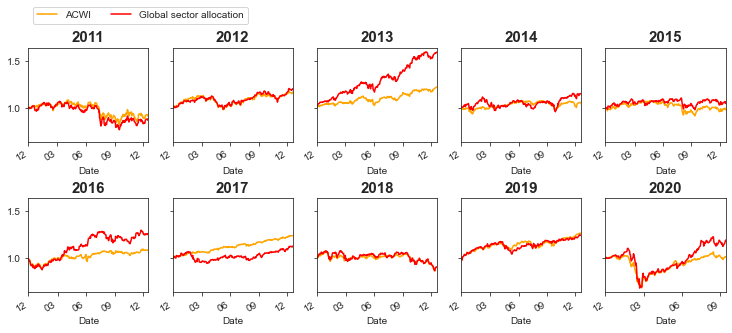

In [312]:
gsam.plot_cum_yearly(strats, names=names, color=color);#, remove=range(2003,2016));

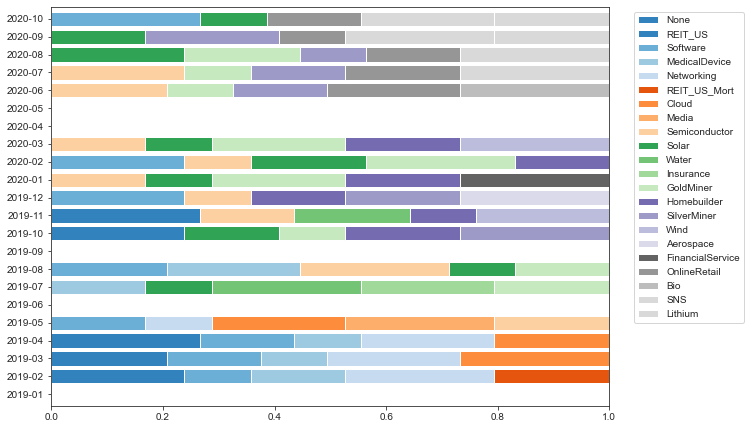

In [314]:
gsam.plot_weight([2019,2020]);

In [321]:
gsam.weight.iloc[-1][gsam.weight.iloc[-1]>0]

Software        0.266760
OnlineRetail    0.168714
Lithium         0.206631
Solar           0.119299
SNS             0.238597
Name: 2020-09-30 00:00:00, dtype: float64

In [560]:
%matplotlib inline
%load_ext autoreload
%autoreload

import os, sys
parentdir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
sys.path.append(parentdir)

from quanty.model import backtester as q
from quanty.model import backtester_base as q_base
from quanty.model import db_manager as dm
from quanty.model import plotter as pltr
from quanty.model import setting
from quanty.model.portfolio import Port
from quanty.model.dual_momentum import DualMomentumSelector, DualMomentumPort

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.debugger import set_trace

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [561]:
# db2 = dm.read_db(base='prices_global.pkl', add=['prices_kr.pkl'])

In [568]:
ufam = q.Backtester(
    setting.base_params(db), 
    w_type='inv_ranky2', 
    rebal_style='cum', 
    n_picks=2, 
    assets=setting.assets_us_factor3, 
    sig_w_base=[1,0,0,0,0,0,0,0,0,0,0,0], 
    #sig_w_dynamic=True, 
    sig_dyn_fwd=21*np.array([1]), 
    #sig_dyn_m_backs=12, 
    #sig_dyn_thres=0.0, 
    follow_trend=(20,60), 
    follow_trend_market=(20,60), 
    follow_trend_supporter=(60,250), 
    strong_condition=True, 
    market='US', 
    #supporter='BND_US_Long', 
    cash_equiv='US', #'BND_US_Tbill', 
    start='2010-12-31', 
    end='2020-09-30' 
)


7.228678226470947


<Figure size 432x288 with 0 Axes>

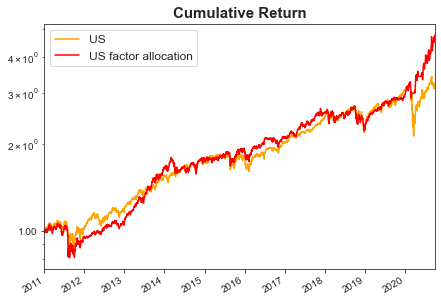

In [552]:
strats = ['US', 'DualMomentum']
names = ['US', 'US factor allocation']
color = ['orange', 'r']

ufam.plot_cum(strats, names=names, color=color, logy=True);

<Figure size 432x288 with 0 Axes>

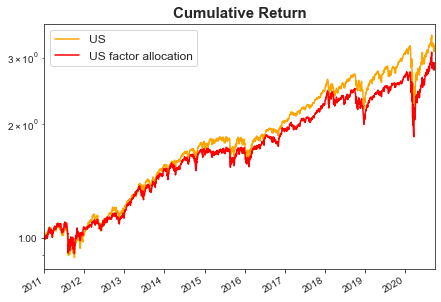

In [569]:
strats = ['US', 'DualMomentum']
names = ['US', 'US factor allocation']
color = ['orange', 'r']

ufam.plot_cum(strats, names=names, color=color, logy=True);

<Figure size 432x288 with 0 Axes>

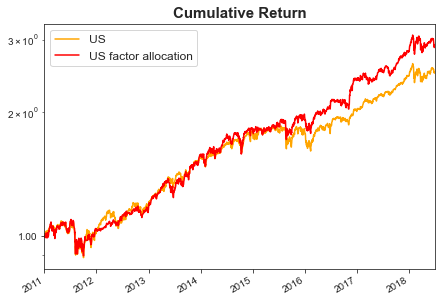

In [481]:
strats = ['US', 'DualMomentum']
names = ['US', 'US factor allocation']
color = ['orange', 'r']

gram.plot_cum(strats, names=names, color=color, logy=True);

<Figure size 432x288 with 0 Axes>

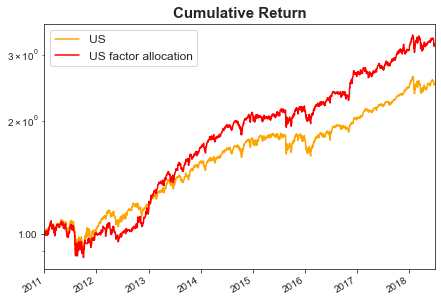

In [437]:
strats = ['US', 'DualMomentum']
names = ['US', 'US factor allocation']
color = ['orange', 'r']

gram.plot_cum(strats, names=names, color=color, logy=True);

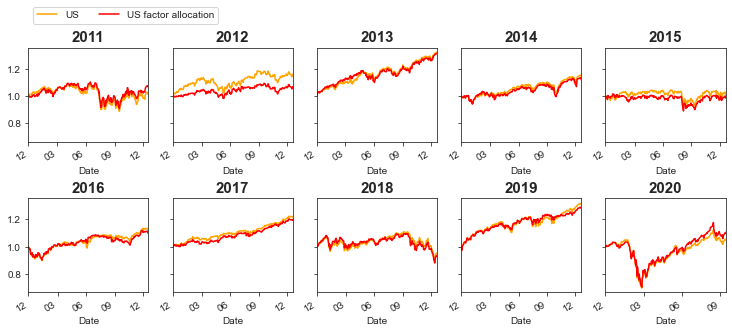

In [566]:
ufam.plot_cum_yearly(strats, names=names, color=color);#, remove=range(2003,2016));

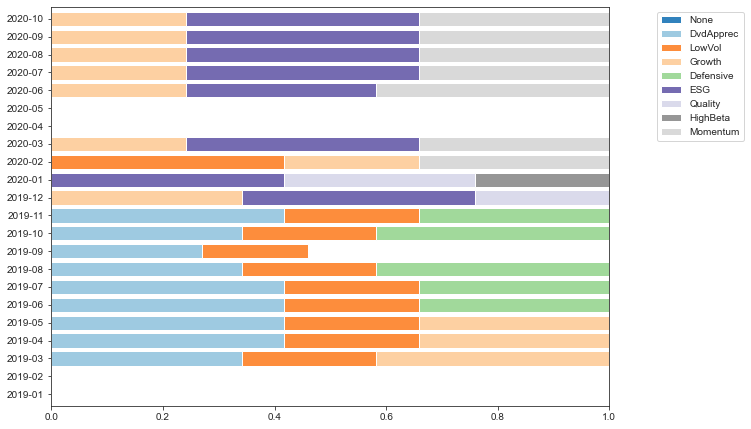

In [567]:
ufam.plot_weight([2019,2020]);